In [1]:
import cifar100 as cf
import numpy as np
import NearestNeighbor as nn

In [2]:
names = cf.load_classes(cf.file_path+"meta")
images, labels = cf.load_data(cf.file_path+"train")

training_data , training_labels = cf.slice_data(images, labels , 9960)
testing_data, testing_labels = cf.load_data(cf.file_path+"test")

In [2]:
n = 3
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,25,30]

In [4]:
nb = nn.NearestNeighbor()
acc_mean = []
acc_std  = []

In [5]:
# 3 cross fold validation
for k in K:
    accs = []
    for i in range(n):
        Xtr , Ytr, Xval , Yval = cf.crossfold(training_data, labels, n,i)
        nb.train(Xtr, Ytr)
        Yval_predict = nb.predict(Xval,k)
        print(Yval_predict.shape)
        acc = np.mean(Yval_predict == Yval)
        accs.append(acc)
        print(acc)
    acc_mean.append(np.mean(accs))
    acc_std.append(np.std(accs))

(3320,)
0.20421686746987952
(3320,)
0.19819277108433736
(3320,)
0.20150602409638554
(3320,)
0.19728915662650603
(3320,)
0.18674698795180722
(3320,)
0.1855421686746988
(3320,)
0.19879518072289157
(3320,)
0.19036144578313252
(3320,)
0.1897590361445783
(3320,)
0.20722891566265061
(3320,)
0.20180722891566266
(3320,)
0.19849397590361445
(3320,)
0.20963855421686747
(3320,)
0.20542168674698796
(3320,)
0.20150602409638554
(3320,)
0.2099397590361446
(3320,)
0.20873493975903615
(3320,)
0.20662650602409638
(3320,)
0.21204819277108433
(3320,)
0.2141566265060241
(3320,)
0.20512048192771085
(3320,)
0.21295180722891566
(3320,)
0.211144578313253
(3320,)
0.20481927710843373
(3320,)
0.21807228915662652
(3320,)
0.21445783132530122
(3320,)
0.21204819277108433
(3320,)
0.21295180722891566
(3320,)
0.21265060240963857
(3320,)
0.2075301204819277
(3320,)
0.21746987951807228
(3320,)
0.21626506024096387
(3320,)
0.20662650602409638
(3320,)
0.21987951807228914
(3320,)
0.21295180722891566
(3320,)
0.2105421686746988


In [6]:
for i in range(len(acc_mean)):
    print(" k " , i+1 , "Mean is ",  acc_mean[i], "std" , acc_std[i])
 

(' k ', 1, 'Mean is ', 0.20130522088353411, 'std', 0.0024634225193544738)
(' k ', 2, 'Mean is ', 0.18985943775100403, 'std', 0.005276579656012419)
(' k ', 3, 'Mean is ', 0.1929718875502008, 'std', 0.004125027828147419)
(' k ', 4, 'Mean is ', 0.20251004016064256, 'std', 0.0036004861600484224)
(' k ', 5, 'Mean is ', 0.20552208835341365, 'std', 0.0033208504836428174)
(' k ', 6, 'Mean is ', 0.20843373493975903, 'std', 0.0013692953511030052)
(' k ', 7, 'Mean is ', 0.21044176706827308, 'std', 0.003859916222237165)
(' k ', 8, 'Mean is ', 0.20963855421686747, 'std', 0.003486697862286213)
(' k ', 9, 'Mean is ', 0.21485943775100402, 'std', 0.0024756682742847367)
(' k ', 10, 'Mean is ', 0.21104417670682732, 'std', 0.0024878537536875277)
(' k ', 11, 'Mean is ', 0.2134538152610442, 'std', 0.004852628905058065)
(' k ', 12, 'Mean is ', 0.2144578313253012, 'std', 0.00395791231815803)
(' k ', 13, 'Mean is ', 0.21536144578313254, 'std', 0.0062748995951806205)
(' k ', 14, 'Mean is ', 0.21596385542168672,

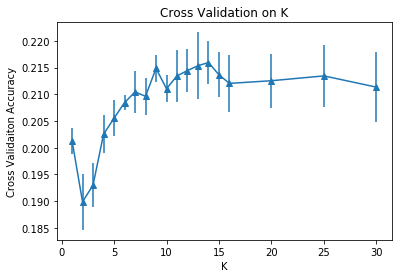

In [10]:
import matplotlib.pyplot as plt
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,25,30]
acc_mean = [0.20130522088353411,0.18985943775100403,0.1929718875502008 ,0.20251004016064256, 0.20552208835341365, 0.20843373493975903,
           0.21044176706827308,0.20963855421686747, 0.21485943775100402,0.21104417670682732,0.2134538152610442,0.2144578313253012,
           0.21536144578313254,0.21596385542168672,0.21365461847389558,0.21204819277108436,0.21255020080321285,0.2134538152610442,0.21134538152610438   ]
acc_std = [0.0024634225193544738,0.005276579656012419,0.004125027828147419,0.0036004861600484224,0.0033208504836428174,
          0.0013692953511030052,0.003859916222237165,0.003486697862286213, 0.0024756682742847367, 0.0024878537536875277,0.004852628905058065,
          0.00395791231815803,0.0062748995951806205,0.004063475169648195,0.004204897909914046,0.005393725308659956,0.005054101585804502, 0.0058267542684927245,0.006563839007502468  ] 

plt.title("Cross Validation on K")
plt.ylabel("Cross Validaiton Accuracy")
plt.xlabel("K")
plt.errorbar(K, acc_mean, acc_std, marker='^')
plt.show()


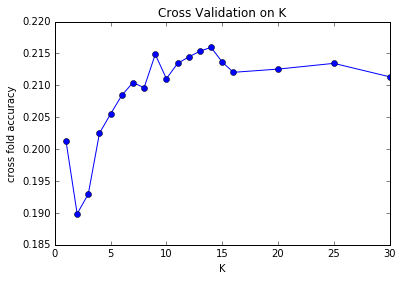

('Best K is : ', 14)


In [7]:
cf.pltacc(K,acc_mean)       
best_k = K[np.argsort(acc_mean)[-1]]        
print("Best K is : " , best_k)

In [8]:
Ytest_predict = nb.predict(testing_data , best_k)
ccrn = cf.ccrn(Ytest_predict, testing_labels)

[10 10  0 ...  4  8  2]
[ 9. 15.  0. ... 15.  0.  8.]
('class occurance', [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500])
('correct_y', array([149., 162., 141., 202., 140.,  53.,  92., 116.,  20., 105., 287.,
        59.,  83., 116.,  18.,  72.,  44., 248.,  12.,  65.]))


In [9]:
print ("CCRn")
for i in range(cf.number_classes):
    print(i , " : ", ccrn[i])

CCRn
(0, ' : ', 0.298)
(1, ' : ', 0.324)
(2, ' : ', 0.282)
(3, ' : ', 0.404)
(4, ' : ', 0.28)
(5, ' : ', 0.106)
(6, ' : ', 0.184)
(7, ' : ', 0.232)
(8, ' : ', 0.04)
(9, ' : ', 0.21)
(10, ' : ', 0.574)
(11, ' : ', 0.118)
(12, ' : ', 0.166)
(13, ' : ', 0.232)
(14, ' : ', 0.036)
(15, ' : ', 0.144)
(16, ' : ', 0.088)
(17, ' : ', 0.496)
(18, ' : ', 0.024)
(19, ' : ', 0.13)


In [10]:
accrn = np.mean(Ytest_predict == testing_labels)
print("ACCR : ", accrn)

('ACCR : ', 0.2184)
